# Load and Clean Data

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [3]:
# Load House Price Dataset from Github to a dataframe
df = pd.read_csv('https://github.com/ArinB/MSBA-CA-Data/raw/main/CA05/movies_recommendation_data.csv')

In [4]:
#Getting to know the data
df

,Movie ID,Movie Name,IMDB Rating,Biography,Drama,Thriller,Comedy,Crime,Mystery,History,Label
0,58,The Imitation Game,8.0,1,1,1,0,0,0,0,0
1,8,Ex Machina,7.7,0,1,0,0,0,1,0,0
2,46,A Beautiful Mind,8.2,1,1,0,0,0,0,0,0
3,62,Good Will Hunting,8.3,0,1,0,0,0,0,0,0
4,97,Forrest Gump,8.8,0,1,0,0,0,0,0,0
5,98,21,6.8,0,1,0,0,1,0,1,0
6,31,Gifted,7.6,0,1,0,0,0,0,0,0
7,3,Travelling Salesman,5.9,0,1,0,0,0,1,0,0
8,51,Avatar,7.9,0,0,0,0,0,0,0,0
9,47,The Karate Kid,7.2,0,1,0,0,0,0,0,0


In [5]:
## print the shape of the dataframe
print(df.shape)
#There are 11 columns and 30 rows

(30, 11)


In [6]:
#  Show the DataFrame's data types
pd.set_option('display.max_rows', None)
print(df.dtypes)

Movie ID         int64
Movie Name      object
IMDB Rating    float64
Biography        int64
Drama            int64
Thriller         int64
Comedy           int64
Crime            int64
Mystery          int64
History          int64
Label            int64
dtype: object


# K-NN Recommender System with Euclidean

What are the Top 5 "More Like This" recommendations for the movie "The Post"?

In [7]:
# Genre Info about "The Post": IMDB Rating = 7.2, Biography = Yes, Drama = Yes, Thriller = No, Comedy = No, Crime = No, Mystery = No, History = Yes

# Feature vector for "The Post"
the_post_features = [[7.2, 1, 1, 0, 0, 0, 0, 1]]

# Feature vectors of all movies
movie_features = df[['IMDB Rating', 'Biography', 'Drama', 'Thriller', 'Comedy', 'Crime', 'Mystery', 'History']].values

In [8]:
# Initialize k-NN model with Euclidean distance
knn_euclidean = NearestNeighbors(n_neighbors=6, metric='euclidean')  # We specify euclidean distance as the metric

# Fit the model
knn_euclidean.fit(movie_features)

# Find the nearest neighbors (excluding the movie itself)
distances, indices = knn_euclidean.kneighbors(the_post_features)

# Extract indices of similar movies
similar_movie_indices = indices.flatten()[1:]  # Exclude the first index which corresponds to "The Post" itself

# Get top 5 similar movies
top_similar_movies = df.iloc[similar_movie_indices]

# Display the recommended movies
print("Top 5 movies similar to 'The Post' using k-NN:")
for index, movie in top_similar_movies.iterrows():
    print(movie['Movie Name'])

Top 5 movies similar to 'The Post' using k-NN:
Hacksaw Ridge
Queen of Katwe
The Wind Rises
A Beautiful Mind
The Karate Kid


In [9]:
# Display the recommended movies
print("Displaying the recommended movies:")
for index, movie in top_similar_movies.iterrows():
    print(f"{movie['Movie Name']}:")
    print(f"  IMDB Rating: {movie['IMDB Rating']}")
    print(f"  Biography: {'Yes' if movie['Biography'] == 1 else 'No'}")
    print(f"  Drama: {'Yes' if movie['Drama'] == 1 else 'No'}")
    print(f"  Thriller: {'Yes' if movie['Thriller'] == 1 else 'No'}")
    print(f"  Comedy: {'Yes' if movie['Comedy'] == 1 else 'No'}")
    print(f"  Crime: {'Yes' if movie['Crime'] == 1 else 'No'}")
    print(f"  Mystery: {'Yes' if movie['Mystery'] == 1 else 'No'}")
    print(f"  History: {'Yes' if movie['History'] == 1 else 'No'}")
    print()

Displaying the recommended movies:
Hacksaw Ridge:
  IMDB Rating: 8.2
  Biography: Yes
  Drama: Yes
  Thriller: No
  Comedy: No
  Crime: No
  Mystery: No
  History: Yes

Queen of Katwe:
  IMDB Rating: 7.4
  Biography: Yes
  Drama: Yes
  Thriller: No
  Comedy: No
  Crime: No
  Mystery: No
  History: No

The Wind Rises:
  IMDB Rating: 7.8
  Biography: Yes
  Drama: Yes
  Thriller: No
  Comedy: No
  Crime: No
  Mystery: No
  History: No

A Beautiful Mind:
  IMDB Rating: 8.2
  Biography: Yes
  Drama: Yes
  Thriller: No
  Comedy: No
  Crime: No
  Mystery: No
  History: No

The Karate Kid:
  IMDB Rating: 7.2
  Biography: No
  Drama: Yes
  Thriller: No
  Comedy: No
  Crime: No
  Mystery: No
  History: No



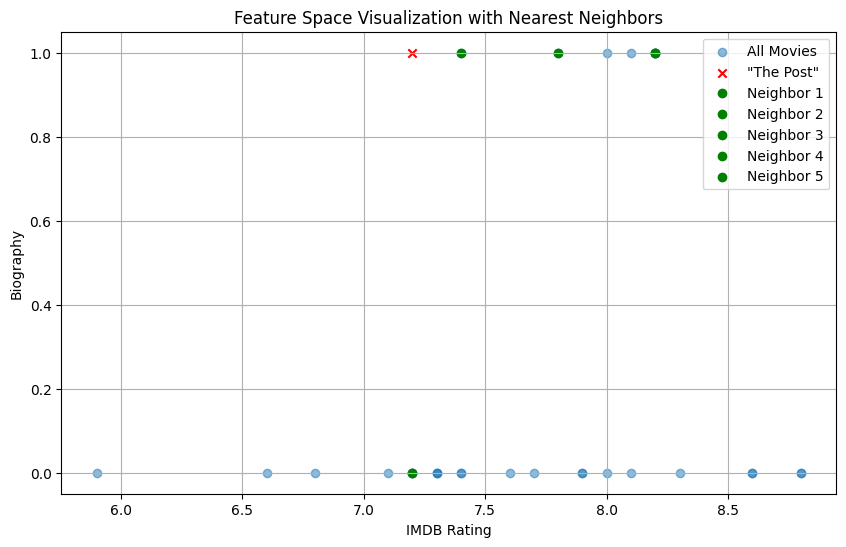

In [10]:
# Plotting the feature space
plt.figure(figsize=(10, 6))
plt.scatter(movie_features[:, 0], movie_features[:, 1], alpha=0.5, label='All Movies')
plt.scatter(the_post_features[0][0], the_post_features[0][1], color='red', marker='x', label='"The Post"')

# Highlighting the nearest neighbors
for i, index in enumerate(similar_movie_indices):
    plt.scatter(movie_features[index][0], movie_features[index][1], color='green', marker='o', label=f'Neighbor {i+1}')

plt.xlabel('IMDB Rating')
plt.ylabel('Biography')
plt.title('Feature Space Visualization with Nearest Neighbors')
plt.legend()
plt.grid(True)
plt.show()

# K-NN Recommender System with Manhattan

What are the Top 5 "More Like This" recommendations for the movie "The Post"?

In [12]:
# Initialize k-NN model with Manhattan distance
knn_manhattan = NearestNeighbors(n_neighbors=6, metric='manhattan')  # We specify Manhattan distance as the metric

# Fit the model
knn_manhattan.fit(movie_features)

# Find the nearest neighbors (excluding the movie itself)
distances, indices = knn_manhattan.kneighbors(the_post_features)

# Extract indices of similar movies
similar_movie_indices = indices.flatten()[1:]  # Exclude the first index which corresponds to "The Post" itself

# Get top 5 similar movies
top_similar_movies = df.iloc[similar_movie_indices]

# Display the recommended movies
print("Top 5 movies similar to 'The Post' using k-NN:")
for index, movie in top_similar_movies.iterrows():
    print(movie['Movie Name'])

# Same output as Euclidean

Top 5 movies similar to 'The Post' using k-NN:
Hacksaw Ridge
Queen of Katwe
The Wind Rises
A Beautiful Mind
The Karate Kid


In [13]:
# Display the recommended movies
print("Displaying the recommended movies:")
for index, movie in top_similar_movies.iterrows():
    print(f"{movie['Movie Name']}:")
    print(f"  IMDB Rating: {movie['IMDB Rating']}")
    print(f"  Biography: {'Yes' if movie['Biography'] == 1 else 'No'}")
    print(f"  Drama: {'Yes' if movie['Drama'] == 1 else 'No'}")
    print(f"  Thriller: {'Yes' if movie['Thriller'] == 1 else 'No'}")
    print(f"  Comedy: {'Yes' if movie['Comedy'] == 1 else 'No'}")
    print(f"  Crime: {'Yes' if movie['Crime'] == 1 else 'No'}")
    print(f"  Mystery: {'Yes' if movie['Mystery'] == 1 else 'No'}")
    print(f"  History: {'Yes' if movie['History'] == 1 else 'No'}")
    print()

Displaying the recommended movies:
Hacksaw Ridge:
  IMDB Rating: 8.2
  Biography: Yes
  Drama: Yes
  Thriller: No
  Comedy: No
  Crime: No
  Mystery: No
  History: Yes

Queen of Katwe:
  IMDB Rating: 7.4
  Biography: Yes
  Drama: Yes
  Thriller: No
  Comedy: No
  Crime: No
  Mystery: No
  History: No

The Wind Rises:
  IMDB Rating: 7.8
  Biography: Yes
  Drama: Yes
  Thriller: No
  Comedy: No
  Crime: No
  Mystery: No
  History: No

A Beautiful Mind:
  IMDB Rating: 8.2
  Biography: Yes
  Drama: Yes
  Thriller: No
  Comedy: No
  Crime: No
  Mystery: No
  History: No

The Karate Kid:
  IMDB Rating: 7.2
  Biography: No
  Drama: Yes
  Thriller: No
  Comedy: No
  Crime: No
  Mystery: No
  History: No



**It appears that regardless of whether we utilized the Euclidean or Manhattan distance metric, the resulting top recommended movies remain consistent. This suggests that the choice of distance metric does not notably influence the recommended selections in this context**